In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
data_titanic=pd.read_csv('C:/adsaada/titanic/titanic.csv')
data_titanic=data_titanic[['pclass','gender','age','survived']]

In [4]:
data_titanic.isnull().sum(),data_titanic['age'].isnull().sum()

(pclass        0
 gender        0
 age         263
 survived      0
 dtype: int64,
 np.int64(263))

dealing with the empty cell values

In [4]:
data_titanic.columns
data_titanic=data_titanic.dropna(subset=['gender','pclass','survived'])

In [12]:
data_titanic

,pclass,gender,age,survived
0,1,female,29.0000,1
1,1,male,0.9167,1
2,1,female,2.0000,0
3,1,male,30.0000,0
4,1,female,25.0000,0
...,...,...,...,...
1304,3,female,14.5000,0
1305,3,female,NaN,0
1306,3,male,26.5000,0
1307,3,male,27.0000,0


label encoding

changing string values to binary. preprocessig; label encodeing. convert male and female from gender to a numeric values


In [5]:
data_titanic['gender']=data_titanic['gender'].map({"male":1,'female':0})
data_titanic

#alternative--1
# data_titanic
#from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# convert_gen_to_num=le.fit_transform(data_titanic['gender'])
# convert_gen_to_num
# data_titanic.drop('gender',axis=1,inplace=True)

#Alternative---2
# data_titanic['gender']=data_titanic['gender'].apply(lambda x: 1 if x=='female' else 0 if x=='male' else -1)
data_titanic

#
# def gender_male_female(x):
#     if x=='male':
#         return 1
#     if x=='female':
#         return 0
#     else:
#         return -1

# data_titanic['gender']=data_titanic['gender'].apply(gender_male_female)
data_titanic



,pclass,gender,age,survived
0,1,0,29.0000,1
1,1,1,0.9167,1
2,1,0,2.0000,0
3,1,1,30.0000,0
4,1,0,25.0000,0
...,...,...,...,...
1304,3,0,14.5000,0
1305,3,0,NaN,0
1306,3,1,26.5000,0
1307,3,1,27.0000,0


In [6]:
data_titanic.info()
data_titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   gender    1309 non-null   int64  
 2   age       1046 non-null   float64
 3   survived  1309 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 41.0 KB


,pclass,gender,age,survived
count,1309.000000,1309.000000,1046.000000,1309.000000
mean,2.294882,0.644003,29.881135,0.381971
std,0.837836,0.478997,14.413500,0.486055
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,21.000000,0.000000
50%,3.000000,1.000000,28.000000,0.000000
75%,3.000000,1.000000,39.000000,1.000000
max,3.000000,1.000000,80.000000,1.000000


handling empty cell

In [6]:
x=data_titanic['age'].mean()
x
data_titanic['age'].fillna(x,inplace=True)
# data_titanic
# data_titanic.isnull().sum()



C:\Users\dell\AppData\Local\Temp\ipykernel_10704\2613346536.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_titanic['age'].fillna(x,inplace=True)


In [9]:
data_titanic.describe()

,pclass,gender,age,survived
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.644003,29.881135,0.381971
std,0.837836,0.478997,12.883199,0.486055
min,1.000000,0.000000,0.166700,0.000000
25%,2.000000,0.000000,22.000000,0.000000
50%,3.000000,1.000000,29.881135,0.000000
75%,3.000000,1.000000,35.000000,1.000000
max,3.000000,1.000000,80.000000,1.000000


In [7]:
features=data_titanic[['pclass','gender','age']]
features
target=data_titanic['survived']
target.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [9]:
data_titanic['survived'].isnull().sum()

np.int64(0)

In [12]:
#another way using sklearn  

# from sklearn.impute import SimpleImputer
# imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
# features=imputer.fit_transform(features)
# features
features_train.isnull().sum()

pclass    0
gender    0
age       0
dtype: int64

spliting dataset into train and test

In [8]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [13]:
target.ndim

1

In [14]:
features.ndim

2

trainning model

In [9]:
model=LogisticRegression()
model.fit(features_train,target_train)

LogisticRegression()

In [16]:
data_titanic.info()
data_titanic.describe()
data_titanic.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   gender    1309 non-null   int64  
 2   age       1309 non-null   float64
 3   survived  1309 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 41.0 KB


pclass      0
gender      0
age         0
survived    0
dtype: int64

Missing values in X_train: pclass    0
gender    0
age       0
dtype: int64
Missing values in y_train: 0


C:\Users\dell\AppData\Local\Temp\ipykernel_5372\1986880059.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_titanic['age'].fillna(data_titanic['age'].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_5372\1986880059.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

LogisticRegression()

In [10]:
prediction=model.predict(features_test)
# model.predict_proba([[1,1,34]])

In [18]:
data_titanic.columns

Index(['pclass', 'gender', 'age', 'survived'], dtype='object')

In [19]:
import os
foldername="logistic_reg_titanic"
if not os.path.exists(foldername):
    os.mkdir(foldername)
    print("made")
else:
    print("alreday")


alreday


In [11]:
filename='logistic_reg_titanic/titanic_logistic_model1.sav'

In [12]:
import pickle

In [ ]:
pickle.dump(model,open(filename,'wb'))

In [23]:
load=pickle.load(open(filename,'rb'))
result=load.predict_proba([[1,1,13]])
result
model.predict_proba(np.array([1,1,49]).reshape(-1,3))

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.70886329, 0.29113671]])

In [111]:
predicative_data=[[1,1,34],[2,0,40],[3,0,50],[3,0,60]]
testing_prob=load.predict_proba(predicative_data)
for i,values in enumerate(predicative_data):
    print(f"{values} ,probability {testing_prob[i]}")

[1, 1, 34] ,probability [0.61325859 0.38674141]
[2, 0, 40] ,probability [0.29987088 0.70012912]
[3, 0, 50] ,probability [0.60549549 0.39450451]
[3, 0, 60] ,probability [0.67135269 0.32864731]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
data_titanic['gender']

0       0
1       1
2       0
3       1
4       0
       ..
1304    0
1305    0
1306    1
1307    1
1308    1
Name: gender, Length: 1309, dtype: int64

confusion  matrix

In [25]:
confuss_matrix=confusion_matrix(target_test,prediction)
confuss_matrix



array([[128,  16],
       [ 43,  75]])

In [26]:
# def test():
#  accuracy=(128+75)/(128+16+43+75)
#  return accuracy
# test()

# #accuracy
print(accuracy_score(target_test,prediction))

0.7748091603053435


In [27]:
from sklearn.metrics import classification_report
#classification report overall report
print(classification_report(target_test,prediction))

              precision    recall  f1-score   support

           0       0.75      0.89      0.81       144
           1       0.82      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.79      0.76      0.77       262
weighted avg       0.78      0.77      0.77       262



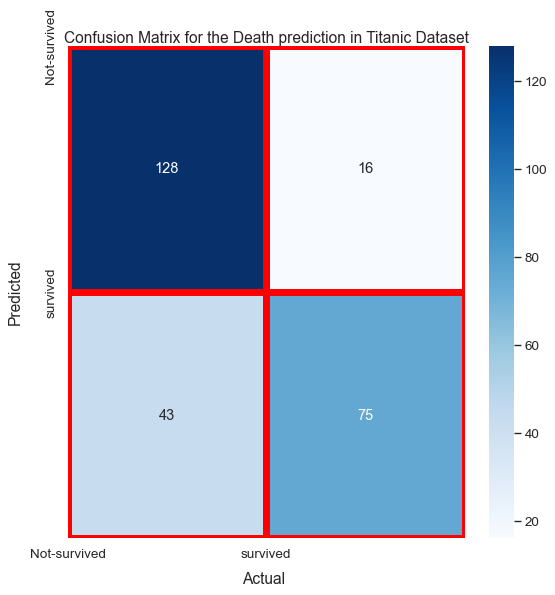

In [28]:
import seaborn as sns
 
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,8), dpi=80)
# Scale up the size of all text
sns.set(font_scale = 1.1)
 
sns.heatmap(confuss_matrix, annot=True, fmt='d',cmap='Blues',linewidths=6,linecolor='red' )
plt.xlabel("Actual ", fontsize=14, labelpad=10)
plt.xticks(ticks=[0,1],labels=['Not-survived', 'survived'])
plt.ylabel("Predicted", fontsize=14, labelpad=20)
plt.yticks(ticks=[0,1],labels=['Not-survived', 'survived'])
plt.title("Confusion Matrix for the Death prediction in Titanic Dataset", fontsize=14, pad=2)
 
plt.show()

<h1> set input class gender age</h1> 

In [35]:
a=int(input("enter the class"))
print(f"class= {a}")
b=input("enter the  gender")
print(f"gender= {b}")
def gender(b):
    if b.lower()=="male":
        return 1
    if b.lower()=="female":
        return 0
    else:
        return -1
v=gender(b)
if v==-1:
    print(f"invalid input")
else:
    c=int(input('enter the age'))
    print(f" Age= {c}")
    predicative_data=[[a,v,c]]
    testing_prob=load.predict_proba(predicative_data)
    for i,values in enumerate(predicative_data):
        print(f"{values} ,probability for survival and not survival {testing_prob[i]}")

class= 1
gender= male
 Age= 36
[1, 1, 36] ,probability for survival and not survival [0.62672887 0.37327113]


c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


sasa

<h1> Logistic regression baesd on age,gender,class,marriage status,survived,embarked</h1> 

In [134]:
import os
from sklearn.metrics import classification_report
data_titanics=pd.read_csv('C:/adsaada/titanic/titanic.csv')

In [122]:
data_titanics.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

#check marriage status

In [135]:

data_titanics['marriage_status']=data_titanics['name'].apply(lambda x: 1 if 'Mr' in  x else 1 if 'Mrs' in x else 0)
# data_titanics['age']=data_titanics['age'].fillna(data_titanics['age'].mean(),inplace=True)
# data_titanics.columns

label encooding
changing gender into  numeric values

In [136]:
def gender_male_female (y):
    if y=='male':
        return 1
    if y=='female':
        return 0
data_titanics['gender']=data_titanics['gender'].apply(gender_male_female)

In [125]:
data_titanics['gender'].value_counts()


gender
1    843
0    466
Name: count, dtype: int64

Fill empty cell of age with the mean age

In [137]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
data_titanics[['age']]=imputer.fit_transform(data_titanics[['age']])

In [138]:
data_titanics.isnull()
data_titanics.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'marriage_status'],
      dtype='object')

In [62]:
data_titanics.isnull().sum()

pclass                0
survived              0
name                  0
gender                0
age                   0
sibsp                 0
parch                 0
ticket                0
fare                  1
cabin              1014
embarked              2
boat                823
body               1188
home.dest           564
marriage_status       0
dtype: int64

In [139]:
data_titanics
data_titanics['embarked']
data_titanics.isnull().sum()
data_titanics['embarked'].value_counts()


embarked
S    914
C    270
Q    123
Name: count, dtype: int64

set missing 2 empty cell of embarked with max embarked location

In [142]:
def embarked_location(z):
    if z=='S':
        return 1
    if z=='C':
        return 2
    if z=='Q':
        return 3
    else:
        return 1
data_titanics['embarked']=data_titanics['embarked'].apply(embarked_location)

In [144]:
data_titanics.isnull().sum()


pclass                0
survived              0
name                  0
gender                0
age                   0
sibsp                 0
parch                 0
ticket                0
fare                  1
cabin              1014
embarked              0
boat                823
body               1188
home.dest           564
marriage_status       0
dtype: int64

In [145]:
data_titanics.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'marriage_status'],
      dtype='object')

In [148]:
data_titanics[['pclass','survived','gender','age','marriage_status','embarked']].isnull().value_counts()

pclass  survived  gender  age    marriage_status  embarked
False   False     False   False  False            False       1309
Name: count, dtype: int64

In [149]:
featured_data=data_titanics[['pclass','gender','age','marriage_status','embarked']]
target_data=data_titanics['survived']


In [151]:
featured_data,target_data

(      pclass  gender        age  marriage_status  embarked
 0          1       0  29.000000                0         1
 1          1       1   0.916700                0         1
 2          1       0   2.000000                0         1
 3          1       1  30.000000                1         1
 4          1       0  25.000000                1         1
 ...      ...     ...        ...              ...       ...
 1304       3       0  14.500000                0         2
 1305       3       0  29.881135                0         2
 1306       3       1  26.500000                1         2
 1307       3       1  27.000000                1         2
 1308       3       1  29.000000                1         1
 
 [1309 rows x 5 columns],
 0       1
 1       1
 2       0
 3       0
 4       0
        ..
 1304    0
 1305    0
 1306    0
 1307    0
 1308    0
 Name: survived, Length: 1309, dtype: int64)

In [199]:
featured_data_train,featured_data_test,target_data_train,target_data_test=train_test_split(featured_data,target_data,train_size=0.8,random_state=42)

In [200]:
model=LogisticRegression()
model.fit(featured_data_train,target_data_train)

LogisticRegression()

set model in file

In [201]:
filenamed='logistic_reg_titanic/titanic_logistic_model_2.sav'
pickle.dump(model,open(filenamed,'wb'))

In [202]:
featured_data

,pclass,gender,age,marriage_status,embarked
0,1,0,29.000000,0,1
1,1,1,0.916700,0,1
2,1,0,2.000000,0,1
3,1,1,30.000000,1,1
4,1,0,25.000000,1,1
...,...,...,...,...,...
1304,3,0,14.500000,0,2
1305,3,0,29.881135,0,2
1306,3,1,26.500000,1,2
1307,3,1,27.000000,1,2


In [203]:
prediction_target=model.predict(featured_data_test)
prediction_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [189]:
# data_titanics[(data_titanics['age']==29) & (data_titanics['pclass']==1)]
data_titanics.head(4)

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,marriage_status
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,1,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,1,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,1,NaN,135.0,"Montreal, PQ / Chesterville, ON",1


In [204]:
data_titanics.columns
featured_data.columns

Index(['pclass', 'gender', 'age', 'marriage_status', 'embarked'], dtype='object')

In [205]:
model.predict_proba([[1,0,29,0,1]])

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.10736567, 0.89263433]])

In [206]:
featured_data_test

,pclass,gender,age,marriage_status,embarked
1148,3,1,35.000000,1,1
1049,3,1,20.000000,1,2
982,3,1,29.881135,1,1
808,3,1,29.881135,1,1
1195,3,1,29.881135,1,3
...,...,...,...,...,...
572,2,0,28.000000,1,1
140,1,1,23.000000,1,2
1182,3,0,21.000000,0,1
312,1,1,50.000000,1,2


confussion matrix

In [213]:
confussed_matrix=confusion_matrix(target_data_test,prediction_target)
confusion_matrix(target_data_test,prediction_target)
accuracy_score(target_data_test,prediction_target)

0.767175572519084

In [209]:
from sklearn.metrics import classification_report

In [211]:
print(classification_report(target_data_test,prediction_target))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       144
           1       0.81      0.63      0.71       118

    accuracy                           0.77       262
   macro avg       0.78      0.75      0.76       262
weighted avg       0.77      0.77      0.76       262



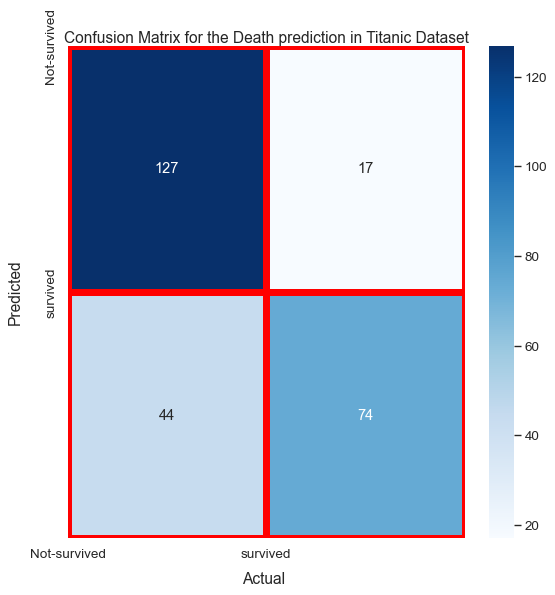

In [214]:
import seaborn as sns
 
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,8), dpi=80)
# Scale up the size of all text
sns.set(font_scale = 1.1)
 
sns.heatmap(confussed_matrix, annot=True, fmt='d',cmap='Blues',linewidths=6,linecolor='red' )
plt.xlabel("Actual ", fontsize=14, labelpad=10)
plt.xticks(ticks=[0,1],labels=['Not-survived', 'survived'])
plt.ylabel("Predicted", fontsize=14, labelpad=20)
plt.yticks(ticks=[0,1],labels=['Not-survived', 'survived'])
plt.title("Confusion Matrix for the Death prediction in Titanic Dataset", fontsize=14, pad=2)
 
plt.show()

In [218]:
loadmodel2=pickle.load(open(filenamed,'rb'))
testing=loadmodel2.predict_proba([[1,1,23,1,1]])
testing
featured_data.columns

c:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Index(['pclass', 'gender', 'age', 'marriage_status', 'embarked'], dtype='object')

In [ ]:
C=int(input("enter the class  choose 1,2,3"))
print(f"class= {C}")
G=input("enter the  gender select male,female")
print(f"gender= {G}")
def gender(G):
    if G.lower()=="male":
        return 1
    if G.lower()=="female":
        return 0
    else:
        return -1
v=gender(G)
if v==-1:
    print(f"invalid input")
else:
    A=int(input('enter  the age'))
    print(f" Age= {A}")
    M=input("if married  yes else no")
    print(f"Married status {M}")
    def status_marriage(M):
        if M.lower()=="yes":
            return 1
        if M.lower()=="no":
            return 0
        else:
            return -1
    K=status_marriage(M)
    if K==-1:
        print("sorry")
    else:
        E=input('enter the location either S/C/Q')
        print(f"embarked  form {E}")
        def status_embarked(E):
            if E.upper()=="S":
                return 1
            if E.upper()=="C":
                return 2
            if E.upper()=="Q":
                return 3
            else:
                return 0
        EM=status_embarked(E)
        if E==0:
            print("sorry")
        else:
            predicatived_datas=[[C,v,A,K,EM]]
            testing_probs=loadmodel2.predict_proba(predicatived_datas)
            for i,values in enumerate(predicatived_datas):
                print(f"{values} ,probability for not-survival and survival {testing_probs[i]}")

In [219]:
data_titanics

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,marriage_status
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.000000,0,0,24160,211.3375,B5,1,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",1,0.916700,1,2,113781,151.5500,C22 C26,1,11,NaN,"Montreal, PQ / Chesterville, ON",0
2,1,0,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1,2,113781,151.5500,C22 C26,1,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1,2,113781,151.5500,C22 C26,1,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",0,14.500000,1,0,2665,14.4542,NaN,2,NaN,328.0,NaN,0
1305,3,0,"Zabour, Miss. Thamine",0,29.881135,1,0,2665,14.4542,NaN,2,NaN,NaN,NaN,0
1306,3,0,"Zakarian, Mr. Mapriededer",1,26.500000,0,0,2656,7.2250,NaN,2,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",1,27.000000,0,0,2670,7.2250,NaN,2,NaN,NaN,NaN,1
